### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

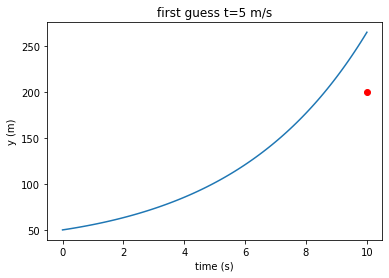

65.36378275659831

In [88]:
# constants
a = 5*10**-2

# initial conditions
t0 = 50
v0 = 5# guess

# boundary conditions
xf = 10
tf = 200 # y at t=5s

# [y, y']
# y_init = [y0, v0]

def rhs(y, t):
    return [y[1], -a*(20 - y[0])]

t = np.linspace(0, 10, 100)
# y = odeint(rhs, y_init, t)

def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.plot(t, y[:, 0])
    # plot the boundary at t_final
    plt.plot(tf, yf, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('y (m)')
    plt.title(title)
    plt.show()
    
def objective_func(v0):
    sol = odeint(rhs, [y0, v0], t)
    y_final = sol[-1, 0]
    return y_final - yf
    
plot_graph(f'first guess t={v0} m/s', odeint(rhs, [y0, v0], t), t, tf, xf)
objective_func(5)

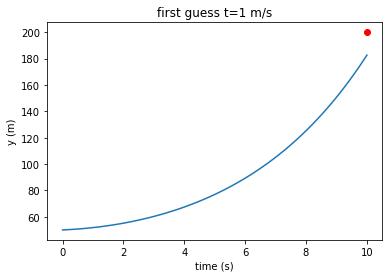

-17.367073528146932

In [89]:
v0 = 1 # guess
plot_graph(f'first guess t={v0} m/s', odeint(rhs, [y0, v0], t), t, tf, xf)
objective_func(1)

f(a)=  65.36378275659831
f(b)=  -17.367073528146932
Optimized speed using shooting method is t=1.8396902901360759 m/s


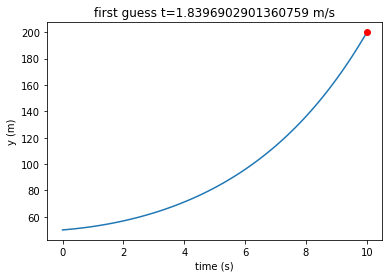

In [93]:
from scipy.optimize import brentq

def objective_func(v0):
    sol = odeint(rhs, [y0, v0], t)
    y_final = sol[-1, 0]
    return y_final - yf

print('f(a)= ', objective_func(5))
print('f(b)= ', objective_func(1))


v0 = brentq(objective_func, 5, 1)
print(f'Optimized speed using shooting method is t={v0} m/s')
plot_graph(f'first guess t={v0} m/s', odeint(rhs, [y0, v0], t), t, tf, xf)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

[[ 1.        0.        0.       ...  0.        0.        0.      ]
 [ 1.       -2.000005  1.       ...  0.        0.        0.      ]
 [ 0.        1.       -2.000005 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.000005  1.        0.      ]
 [ 0.        0.        0.       ...  1.       -2.000005  1.      ]
 [ 0.        0.        0.       ...  0.        0.        1.      ]]
[ 5.e+01 -1.e-04 -1.e-04 ... -1.e-04 -1.e-04  2.e+02]


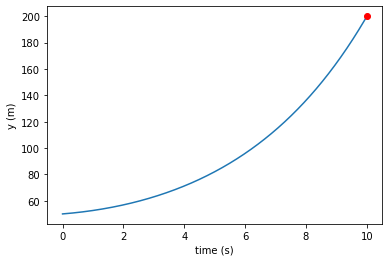

In [104]:
n = 1000
h = (10-0) / n

# Get Matrix A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -(2+a*h**2)
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[0] = 50
b[1:-1] = -a*20*h**2
b[-1] = 200
print(b)

# solve the linear equations A x = b
y = np.linalg.solve(A, b)

t = np.linspace(0, 10, n+1)

plt.plot(t, y)
plt.plot(xf, tf, 'ro')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.show()